# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [138]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
#import citypy

from citipy import citipy



import configparser
config = configparser.ConfigParser()
config.read('config.py')
api_key = config['DEFAULT']['api_key']

In [88]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


In [110]:
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q=Lábrea"


In [111]:
requests.get(query_url).json()

{'coord': {'lon': -64.8, 'lat': -7.26},
 'weather': [{'id': 501,
   'main': 'Rain',
   'description': 'moderate rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 75.6,
  'feels_like': 81.75,
  'temp_min': 75.6,
  'temp_max': 75.6,
  'pressure': 1006,
  'humidity': 89,
  'sea_level': 1006,
  'grnd_level': 1000},
 'visibility': 10000,
 'wind': {'speed': 4.59, 'deg': 277},
 'rain': {'1h': 1.7},
 'clouds': {'all': 100},
 'dt': 1601501336,
 'sys': {'country': 'BR', 'sunrise': 1601460242, 'sunset': 1601504031},
 'timezone': -14400,
 'id': 3663684,
 'name': 'Lábrea',
 'cod': 200}

## Generate Cities List

In [82]:
#cities = requests.get(query_url).json()
#print(json.dumps(cities, indent=4, sort_keys=True))

#ranges of lat and long
#lat_range = (-90, 90)
#long_range = (-180, 80)

#list for variables

lat_long = []
cities = []

#random lat long cordinates and ID Cities
lat = np.random.uniform(low=-90.0, high=90.0, size=2000)
long = np.random.uniform(low=-180.0, high= 80, size = 2000)
lat_long = zip(lat, long)

for lat_long in lat_long:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    if city not in cities:
        cities.append(city)

#count cities
len(cities)



668

In [83]:
print (cities)

['labrea', 'rikitea', 'sao borja', 'saint-vallier', 'barrow', 'barreirinha', 'avarua', 'ushuaia', 'riyadh', 'upernavik', 'taolanaro', 'atuona', 'victoria', 'alice town', 'nouadhibou', 'punta arenas', 'port alfred', 'iqaluit', 'mar del plata', 'souillac', 'kodiak', 'yellowknife', 'conceicao do araguaia', 'bambous virieux', 'bay roberts', 'hilo', 'bolungarvik', 'vaini', 'tiarei', 'vila franca do campo', 'mbeya', 'nador', 'nome', 'pontes e lacerda', 'port elizabeth', 'melita', 'cumaribo', 'kapaa', 'pangnirtung', 'georgetown', 'amderma', 'senanga', 'tumannyy', 'palmira', 'luangwa', 'morbegno', 'hermanus', 'alofi', 'lavumisa', 'mahebourg', 'pangoa', 'yarmouth', 'geraldton', 'erseke', 'mataura', 'saldanha', 'galgani', 'cape town', 'puerto ayora', 'hithadhoo', 'buenos aires', 'jamestown', 'tuktoyaktuk', 'tasiilaq', 'provideniya', 'fairbanks', 'sakakah', 'ucluelet', 'viedma', 'qaanaaq', 'kahului', 'vestmannaeyjar', 'mozarlandia', 'sitka', 'araouane', 'huron', 'bonnyville', 'thompson', 'acapulc

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [124]:



# for city in cities:
#         city_url= query_url + city
#         print("Processing Record {count} | " + city)
                
#         try: 
#             city_var= requests.get(city_url).json()
#             city_data.append({"City": city,
#                               "Lat": city_var["coord"]["lat"],
#                               "Long": city_var["coord"]["lon"],
#                               "Date": city_var["dt"],
#                               "Cloudiness": city_var["clouds"]["all"],
#                               "Humidity" : city_var["main"]["humidity"],
#                               "Max Temp": city_var["main"]["temp_max"],
#                               "Wind Speed" : city_var["wind"]["speed"],
#                               "Country" : city_var["sys"]["country"]})
#         except:
#             print("City not found. Skipping...")

#DF for city info
cities_df = pd.DataFrame({"City": cities})
cities_df['Date'] = ''
cities_df['Cloudiness'] = ''
cities_df['Humidity'] = ''
cities_df['Country'] = ''
cities_df['Lat'] = ''
cities_df['Long'] = ''
cities_df['Max Temp'] = ''
cities_df['Wind Speed'] = ''

city_list =[]
cloudiness = []
country = []
date = []
humidity = []
lat = []
long = []
max_temp = []
wind_speed = []


for city in cities:    
        # assemble url and make API request
        print(f"Processing Record for | {city}.")
       
        
        target_url = ("http://api.openweathermap.org/data/2.5/weather?"
                      'appid={0}&q={1}').format(api_key,city)
        try:
            # extract results
            response = requests.get(target_url).json()
            
            # add the city info to the lists             
            city_list.append(response['name'])
            cloudiness.append(response['clouds']['all'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            humidity.append(response['main']['humidity'])
            lat.append(response['coord']['lat'])
            long.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            wind_speed.append(response['wind']['speed'])
            
        except:
            print("City not found. Skipping...")














Processing Record for | labrea.
Processing Record for | rikitea.
Processing Record for | sao borja.
Processing Record for | saint-vallier.
Processing Record for | barrow.
Processing Record for | barreirinha.
Processing Record for | avarua.
Processing Record for | ushuaia.
Processing Record for | riyadh.
Processing Record for | upernavik.
Processing Record for | taolanaro.
City not found. Skipping...
Processing Record for | atuona.
Processing Record for | victoria.
Processing Record for | alice town.
Processing Record for | nouadhibou.
Processing Record for | punta arenas.
Processing Record for | port alfred.
Processing Record for | iqaluit.
Processing Record for | mar del plata.
Processing Record for | souillac.
Processing Record for | kodiak.
Processing Record for | yellowknife.
Processing Record for | conceicao do araguaia.
Processing Record for | bambous virieux.
Processing Record for | bay roberts.
Processing Record for | hilo.
Processing Record for | bolungarvik.
City not found. S

Processing Record for | arlit.
Processing Record for | mantua.
Processing Record for | palmer.
Processing Record for | itarema.
Processing Record for | crotone.
Processing Record for | chernyshkovskiy.
Processing Record for | harlingen.
Processing Record for | masallatah.
Processing Record for | grand river south east.
City not found. Skipping...
Processing Record for | aakirkeby.
City not found. Skipping...
Processing Record for | kalat.
Processing Record for | nanakuli.
Processing Record for | cimitarra.
Processing Record for | bollnas.
Processing Record for | sopron.
Processing Record for | hualmay.
Processing Record for | saleaula.
City not found. Skipping...
Processing Record for | kudahuvadhoo.
Processing Record for | attawapiskat.
City not found. Skipping...
Processing Record for | lima.
Processing Record for | paamiut.
Processing Record for | kirovskiy.
Processing Record for | garowe.
Processing Record for | wasilla.
Processing Record for | diffa.
Processing Record for | bauchi

Processing Record for | samana.
Processing Record for | diapaga.
Processing Record for | sena madureira.
Processing Record for | soyo.
Processing Record for | carutapera.
Processing Record for | prescott.
Processing Record for | altea.
Processing Record for | tampere.
Processing Record for | buraydah.
Processing Record for | olafsvik.
Processing Record for | aripuana.
Processing Record for | niteroi.
Processing Record for | iracoubo.
Processing Record for | feldkirchen.
Processing Record for | lake havasu city.
Processing Record for | csany.
Processing Record for | luanda.
Processing Record for | wunsiedel.
Processing Record for | bodden town.
Processing Record for | salvador.
Processing Record for | new port richey.
Processing Record for | tabas.
Processing Record for | troitsko-pechorsk.
Processing Record for | beyla.
Processing Record for | puerto baquerizo moreno.
Processing Record for | quesnel.
Processing Record for | ikongo.
Processing Record for | sinnamary.
Processing Record f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [126]:
#convert temp to F
max_temp = [((9/5)* (x-273.15)) + 32 for x in max_temp]



#output file
city_data_file = "cities.csv"

city_df = pd.DataFrame({
                            "City":city_list,
                            "Cloudiness":cloudiness,
                            "Country":country,
                            "Date":date,
                            "Humidity":humidity,
                            "Lat":lat,
                            "Long":long,
                            "Max Temp":max_temp,
                            "Wind Speed":wind_speed
})

#export to csv
city_df.to_csv("cities.csv")
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,Lábrea,100,BR,1601501777,94,-7.26,-64.80,73.778,0.82
1,Rikitea,72,PF,1601501777,82,-23.12,-134.97,71.816,10.82
2,São Borja,4,BR,1601501777,46,-28.66,-56.00,85.370,2.23
3,Saint-Vallier,90,FR,1601501777,93,46.64,4.37,53.600,1.00
4,Barrow,90,US,1601501498,95,71.29,-156.79,32.000,8.20


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

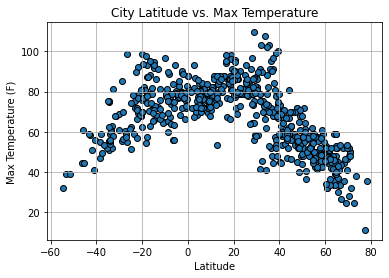

In [132]:

fig, ax = plt.subplots()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
ax.set_title('City Latitude vs. Max Temperature')
ax.scatter(city_df['Lat'],city_df['Max Temp'],edgecolors='black')
plt.grid()
plt.savefig('lat_vs_max_temp.png')

In [ ]:
#shows the heat along the lattitude of the earth
#it is hottest along the equator and coolest at the ends of the earth

## Latitude vs. Humidity Plot

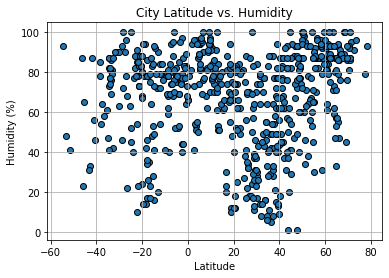

In [133]:
fig, ax = plt.subplots()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
ax.set_title('City Latitude vs. Humidity')
ax.scatter(city_df['Lat'],city_df['Humidity'],edgecolors='black')
plt.grid()
plt.savefig('lat_vs_humidity.png')

In [ ]:
#Shows how humid it is across the lattitude;
#the most humid areas appear to be at the equator and least humid its surrounding ranges

## Latitude vs. Cloudiness Plot

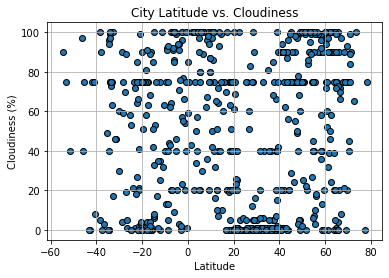

In [134]:
fig, ax = plt.subplots()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
ax.set_title('City Latitude vs. Cloudiness')
ax.scatter(city_df['Lat'],city_df['Cloudiness'],edgecolors='black')
plt.grid()
plt.savefig('lat_vs_cloudiness.png')

In [ ]:
#attempting ot see where cloudiness is relative to lattitude;
#it appears that it there are few cities around the 0-20 lattitude range that have 0% cloudiness

## Latitude vs. Wind Speed Plot

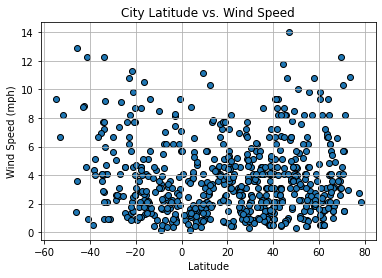

In [135]:

fig, ax = plt.subplots()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
ax.set_title('City Latitude vs. Wind Speed')
ax.scatter(city_df['Lat'],city_df['Wind Speed'],edgecolors='black')
plt.grid()
plt.savefig('lat_vs_wind_speed.png')




In [ ]:
#Looking to see if windspeed is higher at certain lattitudes; 
#it r it does appear there are higher windspeeds towards the extremes of each lattitude

## Linear Regression

In [136]:
#seperate NH and SH into DF


n_hem = city_df.loc[city_df["Lat"]>0.01]
s_hem = city_df.loc[city_df["Lat"]<-0.01]

n_hem.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
3,Saint-Vallier,90,FR,1601501777,93,46.64,4.37,53.600,1.00
4,Barrow,90,US,1601501498,95,71.29,-156.79,32.000,8.20
8,Riyadh,0,SA,1601501779,27,24.69,46.72,78.800,3.10
9,Upernavik,65,GL,1601501779,91,72.79,-56.15,24.692,2.95
11,Hong Kong,100,HK,1601501619,84,22.29,114.16,78.998,0.45


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R Value is -0.7758560709081975


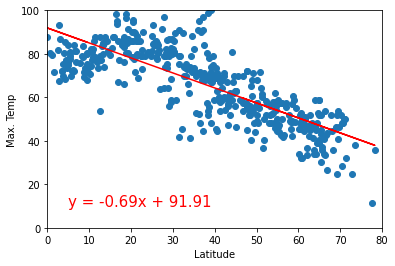

In [161]:


#Create a Scatter Plot for Lat vs Temp of City
x_values = n_hem['Lat']
y_values = n_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(0, 80)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
# plt.show()

print(f"The R Value is {rvalue}")

plt.savefig("Northern Hemisphere Max Tempurature VS Latitude Regression.png")









####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R Value is 0.6155415316287373


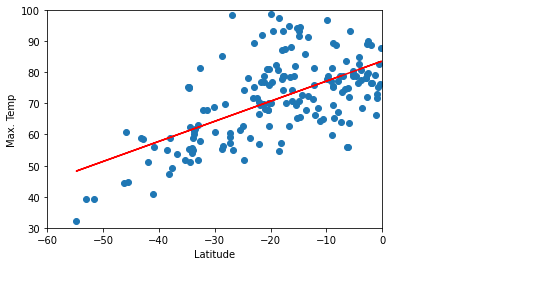

In [162]:
#Create a Scatter Plot for Lattitude vs Temperature of City (Southern Hemisphere)
x_values = s_hem['Lat']
y_values = s_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(30, 100)
plt.xlim(-60, 0, 10)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
# plt.show()

print(f"The R Value is {rvalue}")

plt.savefig("Southern Hemisphere Max Tempurature VS Latitidue Regression.png")


In [ ]:
# the linear regression is modeling the correlation between highest tempuratures as you from north to outh poles

#The tempurature visibly increases as it reached the equator of 0 latitude; 
#the slope appears to be more aggressive in the northern hemisphere as it reaches lower tempurates at end of the latitude

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R Value is 0.16218135877002618


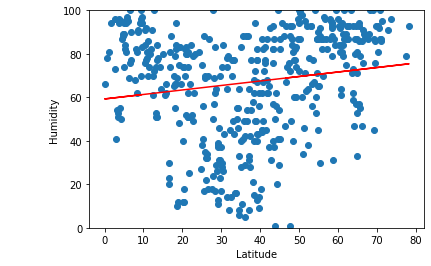

In [163]:
x_values = n_hem['Lat']
y_values = n_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")

plt.ylim(0, 100)

plt.ylabel("Humidity")
plt.xlabel("Latitude")
# plt.show()

print(f"The R Value is {rvalue}")

plt.savefig("Northern Hemisphere Humidity VS Latitude.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R Value is 0.08953891352430914


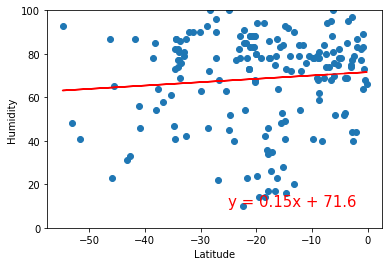

In [164]:
x_values = s_hem['Lat']
y_values = s_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")

plt.ylim(0, 100)

plt.ylabel("Humidity")
plt.xlabel("Latitude")
# plt.show()

print(f"The R Value is {rvalue}")

plt.savefig("Southern Hemisphere Humidity VS Latitude.png")

In [ ]:
# the linear regression is modeling the correlation between levels of humidity as you from north to outh poles


#humidity appears to slightly increase as you moved from negative latitude to 80 which is the south pole

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R Value is 0.08114869347350541


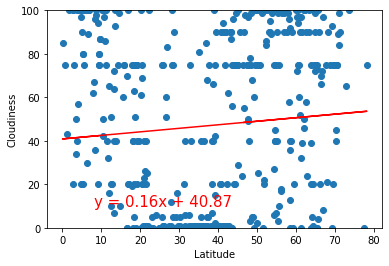

In [165]:
x_values = n_hem['Lat']
y_values = n_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(8,10),fontsize=15,color="red")

plt.ylim(0, 100)

plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
# plt.show()

print(f"The R Value is {rvalue}")

plt.savefig("Northern Hemisphere Cloudiness VS Latitude.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R Value is 0.03809733122893025


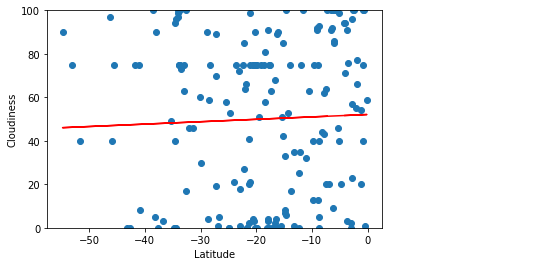

In [166]:
x_values = s_hem['Lat']
y_values = s_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(8,10),fontsize=15,color="red")

plt.ylim(0, 100)

plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
# plt.show()

print(f"The R Value is {rvalue}")

plt.savefig("Southern Hemisphere Cloudiness VS Latitude.png")

In [ ]:
# the linear regression is modeling the correlation between levels of cloudiness as you from north to outh poles
#it appears that the cloudiness also increases slightly from the norther pol to the south pole

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R Value is 0.11279547389386886


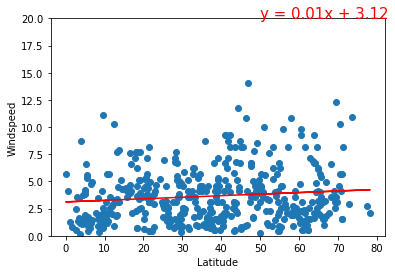

In [167]:
x_values = n_hem['Lat']
y_values = n_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")

plt.ylim(0, 20)

plt.ylabel("Windspeed")
plt.xlabel("Latitude")
# plt.show()

print(f"The R Value is {rvalue}")

plt.savefig("Northern Hemisphere Windspeed VS Latitude.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R Value is -0.2983804566445831


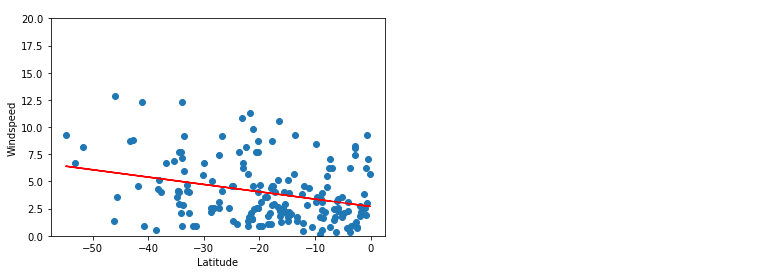

In [168]:
x_values = s_hem['Lat']
y_values = s_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")

plt.ylim(0, 20)

plt.ylabel("Windspeed")
plt.xlabel("Latitude")
# plt.show()

print(f"The R Value is {rvalue}")

plt.savefig("Southern Hemisphere Windspeed VS Latitude.png")

In [ ]:
# the linear regression is modeling the correlation between levels of wind speed as you from north to outh poles

#wind speed appears to be highest in the north pole area and reduce at it hits the equator and increases as it moves to the south pole
